In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

In [5]:
df = pd.read_excel('mysales.xlsx',header=0)
df.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192


In [8]:
# Lấy các cột số liệu
numeric_columns = ['Discount', 'Unit Price', 'Shipping Cost', 'Quantity ordered new', 'Sales']
# In ra thống kê mô tả
df[numeric_columns].describe()

,Discount,Unit Price,Shipping Cost,Quantity ordered new,Sales
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.048975,109.079221,12.968151,12.944672,985.828832
std,0.031378,393.481301,17.414631,13.871565,2559.900167
min,0.000000,1.140000,0.490000,1.000000,2.250000
25%,0.020000,6.480000,3.230000,5.000000,58.807500
50%,0.050000,20.990000,6.150000,10.000000,202.395000
75%,0.080000,100.972500,14.362500,16.000000,802.945000
max,0.210000,6783.020000,164.730000,167.000000,45737.330000


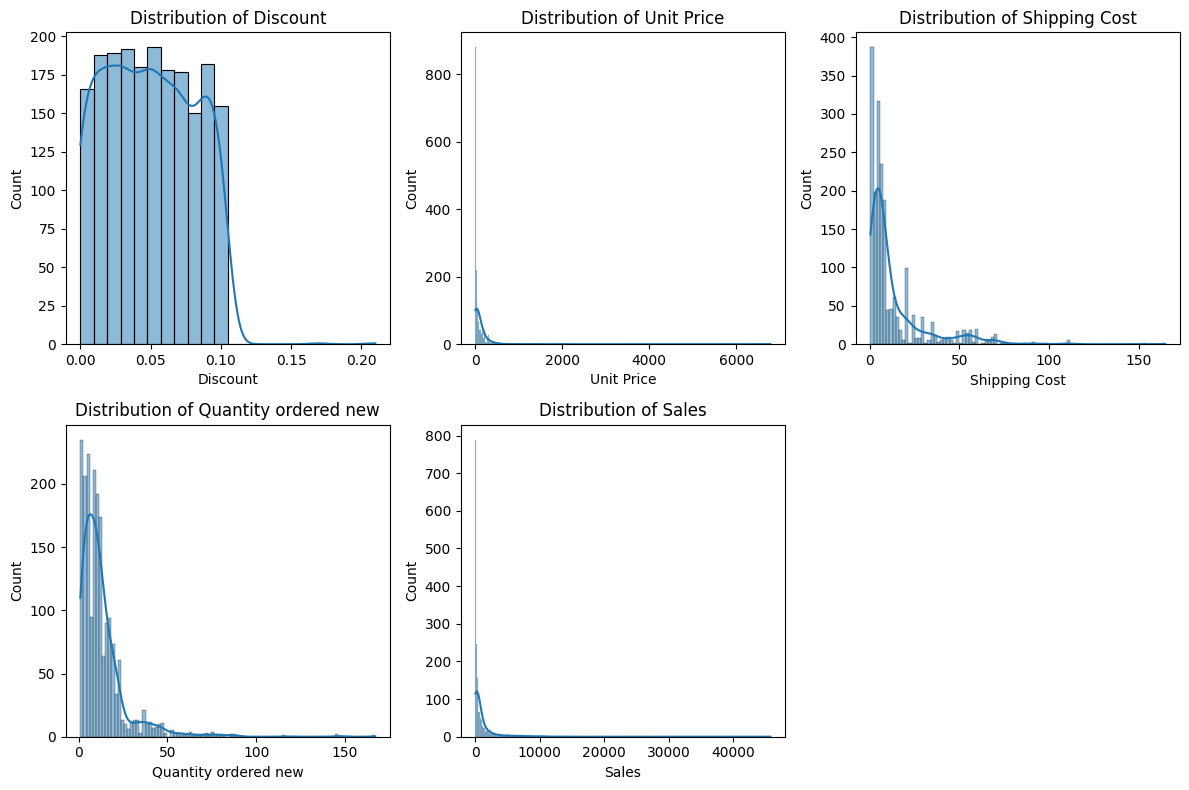

In [9]:
# Vẽ đồ thị phân phối
plt.figure(figsize=(12, 8))
for col in numeric_columns:
    plt.subplot(2, 3, numeric_columns.index(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [14]:
for col in numeric_columns:
    # Kiểm định Shapiro-Wilk
    stat, p_value = shapiro(df[col]) 
    # In kết quả
    print(f'{col}: Statistics={stat:.4f}, p-value={p_value:.4f}')
    # Kiểm tra mức ý nghĩa
    alpha = 0.05
    if p_value > alpha:
        print(f'Phân phối của {col} gần với phân phối chuẩn.\n')
    else:
        print(f'Phân phối của {col} không gần với phân phối chuẩn.\n')

Discount: Statistics=0.9441, p-value=0.0000
Phân phối của Discount không gần với phân phối chuẩn.

Unit Price: Statistics=0.2189, p-value=0.0000
Phân phối của Unit Price không gần với phân phối chuẩn.

Shipping Cost: Statistics=0.6639, p-value=0.0000
Phân phối của Shipping Cost không gần với phân phối chuẩn.

Quantity ordered new: Statistics=0.6824, p-value=0.0000
Phân phối của Quantity ordered new không gần với phân phối chuẩn.

Sales: Statistics=0.3668, p-value=0.0000
Phân phối của Sales không gần với phân phối chuẩn.



In [15]:
df.rename(columns={'Order Priority':'Priority','Shipping Mode':'Mode',
                  'Unit Price':'Price','Shipping Cost':'ShipCost','Quantity ordered new':'Quantity'},inplace=True)
df[['Discount','Price','ShipCost','Quantity','Sales']].iloc[20]

Discount     0.01
Price       17.98
ShipCost     8.51
Quantity     2.00
Sales       40.17
Name: 20, dtype: float64

In [16]:
df.shape

(1952, 25)

In [17]:
df.columns

Index(['Row ID', 'Priority', 'Discount', 'Price', 'ShipCost', 'Customer ID',
       'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category',
       'Product Sub-Category', 'Product Container', 'Product Name',
       'Product Base Margin', 'Country', 'Region', 'State or Province', 'City',
       'Postal Code', 'Order Date', 'Ship Date', 'Profit', 'Quantity', 'Sales',
       'Order ID'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Priority              1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Price                 1952 non-null   float64       
 4   ShipCost              1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [19]:
# Kiểm tra dữ liệu thiếu cho mỗi biến số
missing_values = df.isnull().sum()
# Lọc ra các biến số có dữ liệu thiếu
variables_with_missing_data = missing_values[missing_values > 0]
# In số lượng biến số có dữ liệu thiếu
num_variables_with_missing_data = len(variables_with_missing_data)
print(f'Số biến số có dữ liệu thiếu: {num_variables_with_missing_data}')
print('Biến số và số lượng dữ liệu thiếu cho mỗi biến:')
print(variables_with_missing_data)

Số biến số có dữ liệu thiếu: 1
Biến số và số lượng dữ liệu thiếu cho mỗi biến:
Product Base Margin    16
dtype: int64


In [21]:
# Tính độ lệch cho từng biến số
numeric_columns = ['Discount', 'Price', 'ShipCost', 'Quantity', 'Sales']
skewness_values = df[numeric_columns].skew()
# Xác định biến số có độ lệch nhiều nhất
max_skewness_variable = skewness_values.idxmax()
max_skewness_value = skewness_values.max()
print(f'Biến số có độ lệch nhiều nhất là {max_skewness_variable} với giá trị độ lệch là {max_skewness_value:.2f}')

Biến số có độ lệch nhiều nhất là Price với giá trị độ lệch là 12.14


In [22]:
# Tính ma trận tương quan Pearson
correlation_matrix = df[numeric_columns].corr()
# Tìm cặp giá trị có tương quan lớn nhất không nằm trên đường chéo
max_correlation = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
max_correlation = max_correlation[max_correlation.index.get_level_values(0) != max_correlation.index.get_level_values(1)].idxmax()
print(f'Cặp giá trị có tương quan lớn nhất không nằm trên đường chéo: {max_correlation} với giá trị tương quan là {correlation_matrix.loc[max_correlation]}')

Cặp giá trị có tương quan lớn nhất không nằm trên đường chéo: ('Price', 'Sales') với giá trị tương quan là 0.4435090390634774


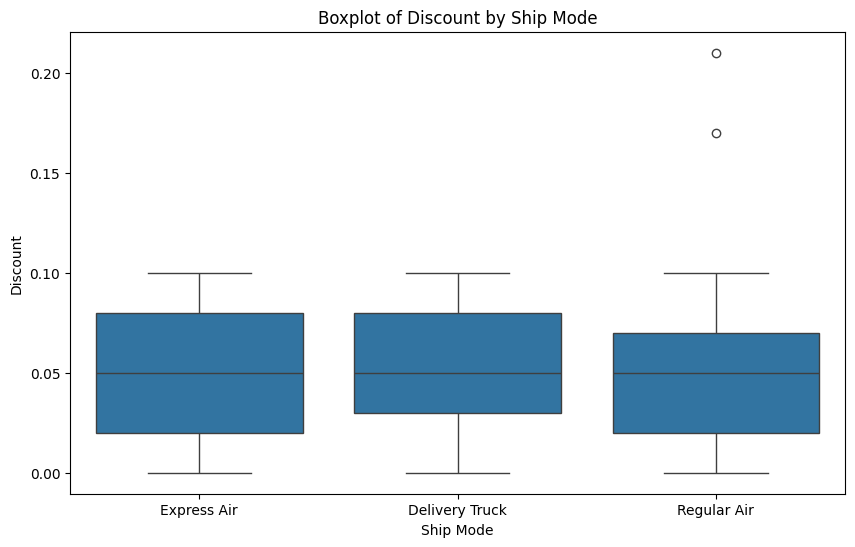

In [23]:
# Vẽ biểu đồ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Discount', data=df)
plt.title('Boxplot of Discount by Ship Mode')
plt.show()

In [24]:
# Groupby theo 'Ship Mode' và tính mô tả thống kê cho 'Discount'
grouped_discount = df.groupby('Ship Mode')['Discount'].describe()
# In thông tin mô tả thống kê
print(grouped_discount)
# Tìm nhóm có giá trị lớn nhất
max_discount_group = grouped_discount['max'].idxmax()
max_discount_value = grouped_discount['max'].max()
print(f'\nNhóm có giá trị lớn nhất là {max_discount_group} với giá trị {max_discount_value:.2f}')
# Kiểm tra xem Ship Mode có giúp dự báo giá trị Discount hay không
# Có thể sử dụng các phương pháp thống kê như ANOVA để kiểm tra sự khác biệt giữa các nhóm

                 count      mean       std  min   25%   50%   75%   max
Ship Mode                                                              
Delivery Truck   275.0  0.051818  0.030512  0.0  0.03  0.05  0.08  0.10
Express Air      240.0  0.051333  0.032159  0.0  0.02  0.05  0.08  0.10
Regular Air     1437.0  0.048038  0.031378  0.0  0.02  0.05  0.07  0.21

Nhóm có giá trị lớn nhất là Regular Air với giá trị 0.21


In [26]:
df['Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

In [27]:
df[['Price', 'ShipCost', 'Quantity', 'Sales']]

,Price,ShipCost,Quantity,Sales
0,2.84,0.93,4,13.01
1,500.98,26.00,12,6362.85
2,9.48,7.29,22,211.15
3,78.69,19.99,16,1164.45
4,3.28,2.31,7,22.23
...,...,...,...,...
1947,10.90,7.46,18,207.31
1948,7.99,5.03,22,143.12
1949,11.97,5.81,5,59.98
1950,9.38,4.93,15,135.78


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
#log , căn, bậc 2 3, sigmoid
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [30]:
X=df[['Price', 'ShipCost', 'Quantity', 'Sales']].values
y=df['Discount'].values
# mức 20% random=16
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [32]:
#poly degree=2, np.sqrt, minmaxscaler, standardscaler, LR
steps=[('standardscaler',StandardScaler()),('minmaxscaler',MinMaxScaler()),('sqrttransform',FunctionTransformer(np.sqrt)),('model',LinearRegression())]
#('minmaxscaler',MinMaxScaler()),

In [33]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', LinearRegression())])

In [34]:
model=pipe.fit(X_train,y_train)
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', LinearRegression())])

In [35]:
# Dự đoán trên tập test
y_test_pred = model.predict(X_test)
#giá trị score
# Tính giá trị R-squared (score)
r2 = model.score(X_test, y_test)
# In giá trị R-squared
print(f'Giá trị R-squared trên tập test: {r2:.4f}')

Giá trị R-squared trên tập test: -0.0002


In [36]:
coefficients = model.named_steps['model'].coef_
intercept = model.named_steps['model'].intercept_
print("Coefficients góc:", coefficients)
print("Intercept tự do:", intercept)

Coefficients góc: [ 0.02431225  0.01034315  0.01409403 -0.03575341]
Intercept tự do: 0.044990525821563376


In [37]:
# In hệ số của mô hình
coefficients = model.named_steps['model'].coef_
# In hệ số chặn (intercept)
intercept = model.named_steps['model'].intercept_
print('Hệ số của mô hình:')
for feature, coefficient in zip(['Price', 'ShipCost', 'Quantity', 'Sales'], coefficients):
    print(f'{feature}: {coefficient:.4f}')
print(f'Chặn (intercept): {intercept:.4f}')

Hệ số của mô hình:
Price: 0.0243
ShipCost: 0.0103
Quantity: 0.0141
Sales: -0.0358
Chặn (intercept): 0.0450


In [38]:
y_test_pred=pipe.predict(X_test)
y_train_pred=pipe.predict(X_train)

In [39]:
print('Value Training')
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Value Training
Score or R-Squared:  0.003584630984168391
Mean Absolute Error:  0.02682312780034355
Mean Squared Error:  0.000978582194280162
Root Mean Squared Error:  0.031282298417478246
Mean Absolute Percentage Error:  18005417765292.703


In [40]:
# Giả sử df là DataFrame của bạn
# df = ...
# Lọc các cột kiểu số nguyên
integer_columns = df.select_dtypes(include='int64').columns
# In số lượng và tên các cột kiểu số nguyên
print(f'Số lượng biến số kiểu số nguyên: {len(integer_columns)}')
print('Các biến số kiểu số nguyên:')
print(integer_columns)

Số lượng biến số kiểu số nguyên: 5
Các biến số kiểu số nguyên:
Index(['Row ID', 'Customer ID', 'Postal Code', 'Quantity', 'Order ID'], dtype='object')


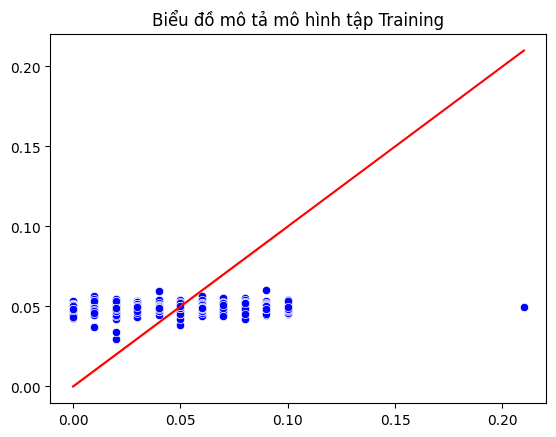

In [41]:
# PP đánh giá 2: Dùng Scatter giữa Actual và Predict
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(), markers='o', color='b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(), markers='s', color='r')
plt.title('Biểu đồ mô tả mô hình tập Training')
plt.show()